In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
cas_data = pd.read_csv("iraste_nxt_cas.csv")
dms_data = pd.read_csv("iraste_nxt_casdms.csv")

In [102]:
print("CAS Dataset - Sample data:")
print(cas_data.head())

CAS Dataset - Sample data:
     Alert        Date      Time        Lat       Long  Vehicle  Speed
0  cas_ldw  2022-05-01  00:00:06  14.196872  77.631213   3829.0     58
1  cas_ldw  2022-05-01  00:00:07  16.511887  80.746034   8111.0     56
2  cas_ldw  2022-05-01  00:00:11  17.908537  78.464064   1153.0     74
3  cas_ldw  2022-05-01  00:00:11  13.152203  77.620431   7103.0     72
4  cas_ldw  2022-05-01  00:00:15  16.512134  80.748452   8111.0     57


In [103]:
cas_data.shape

(1785509, 7)

In [133]:
print("\nMissing Values in CAS Data:")
print(cas_data.isnull().sum())


Missing Values in CAS Data:
Alert          0
Time           0
Lat            1
Long           1
Vehicle        0
Speed          0
Hour           0
Day_of_Week    0
dtype: int64


In [104]:
print("\nDMS Dataset - Sample data:")
print(dms_data.head())


DMS Dataset - Sample data:
     Alert        Date      Time        Lat       Long  Vehicle  Speed
0  cas_hmw  2022-05-01  00:00:29  17.158688  79.306623     3867     55
1  cas_ldw  2022-05-01  00:00:52  17.158928  79.309335     3867     60
2  cas_ldw  2022-05-01  00:01:03  17.159078  79.310747     3867     67
3  cas_ldw  2022-05-01  00:01:16  17.159457  79.314245     3867     73
4  cas_ldw  2022-05-01  00:01:27  16.814285  80.246173     6123     61


In [105]:
print("\nCAS Dataset - Summary Statistics:")
print(cas_data.describe())


CAS Dataset - Summary Statistics:
                Lat          Long       Vehicle         Speed
count  1.785508e+06  1.785508e+06  1.785509e+06  1.785509e+06
mean   1.760528e+01  7.899734e+01  5.536336e+03  5.943645e+01
std    2.125467e+00  1.005071e+00  2.866079e+03  2.063253e+01
min    1.221056e+01  7.390717e+01  1.140000e+02  0.000000e+00
25%    1.662601e+01  7.832018e+01  3.185000e+03  5.000000e+01
50%    1.718232e+01  7.906153e+01  6.132000e+03  6.400000e+01
75%    1.833605e+01  7.953207e+01  8.113000e+03  7.400000e+01
max    2.213794e+01  8.333997e+01  9.887000e+03  1.000000e+02


In [106]:
print("\nDMS Dataset - Summary Statistics:")
print(dms_data.describe())


DMS Dataset - Summary Statistics:
                Lat          Long       Vehicle         Speed
count  60487.000000  60487.000000  60487.000000  60487.000000
mean      17.068180     79.572953   7168.667978     66.157852
std        0.235367      0.607719   1305.320076     14.917828
min       16.492685     78.234730   3867.000000      0.000000
25%       16.916235     79.103022   6123.000000     59.000000
50%       17.158827     79.559413   6837.000000     69.000000
75%       17.229787     80.100460   8122.000000     76.000000
max       17.608050     80.666170   8877.000000    100.000000


In [107]:
dms_data.shape

(60487, 7)

In [134]:
print("\nMissing Values in DMS Data:")
print(dms_data.isnull().sum())


Missing Values in DMS Data:
Alert          0
Time           0
Lat            0
Long           0
Vehicle        0
Speed          0
Hour           0
Day_of_Week    0
dtype: int64


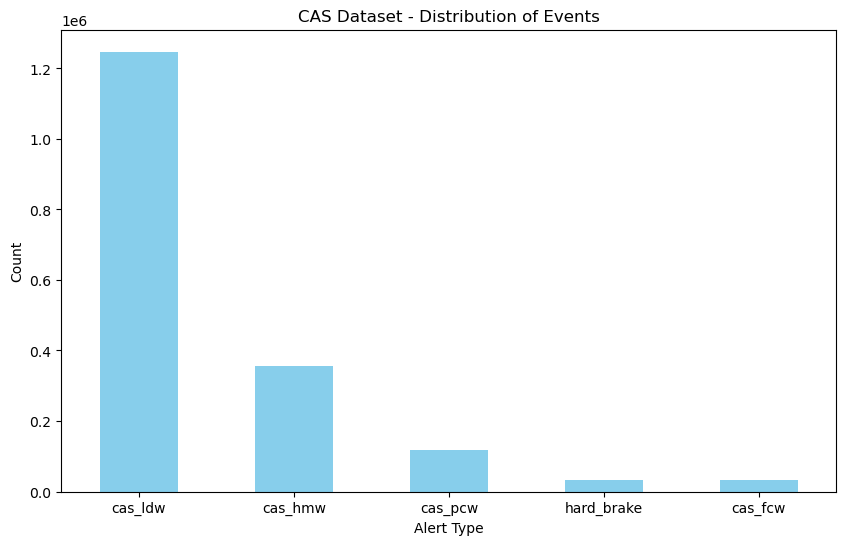

In [108]:
#Distribution of events in CAS dataset
plt.figure(figsize=(10, 6))
cas_data['Alert'].value_counts().plot(kind='bar', color='skyblue')
plt.title("CAS Dataset - Distribution of Events")
plt.xlabel("Alert Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

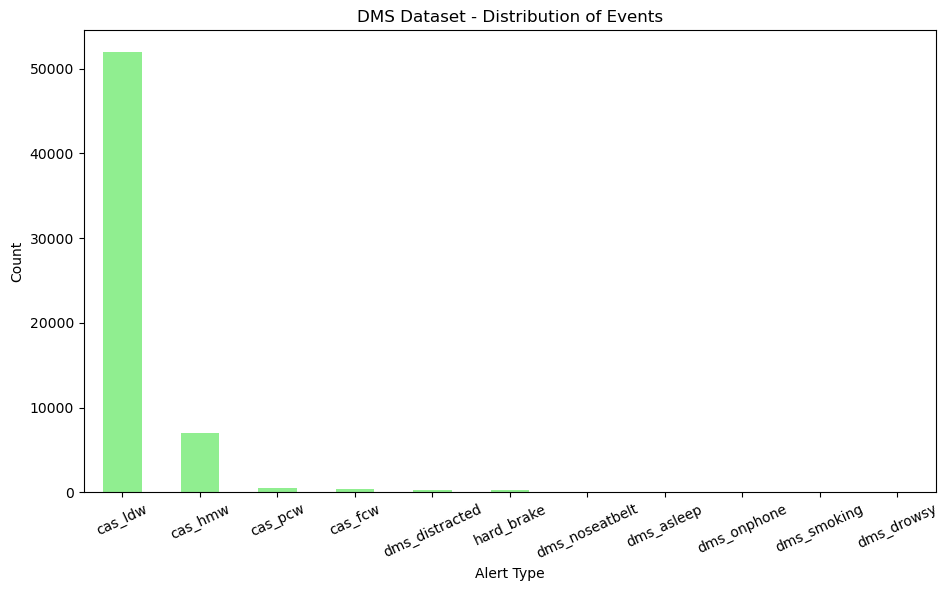

In [109]:
# Distribution of events in DMS dataset
plt.figure(figsize=(11, 6))
dms_data['Alert'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("DMS Dataset - Distribution of Events")
plt.xlabel("Alert Type")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.show()

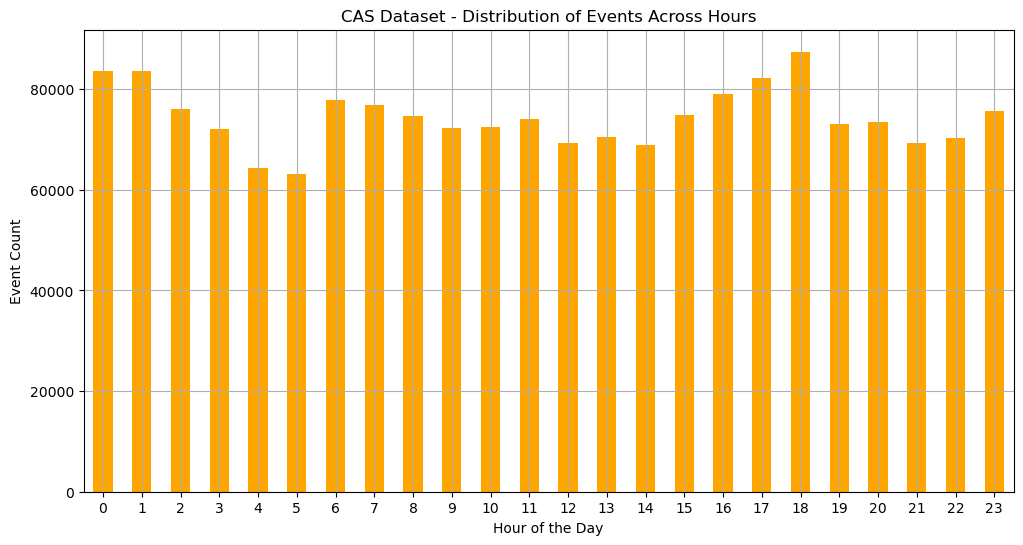

In [110]:
# Plotting the distribution of events across all hours
cas_data['Time'] = pd.to_datetime(cas_data['Time'])
cas_data['Hour'] = cas_data['Time'].dt.hour
hourly_counts = cas_data.groupby(cas_data['Hour'])['Alert'].count()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='orange')
plt.title("CAS Dataset - Distribution of Events Across Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Event Count")
plt.xticks(rotation=0)
plt.grid()
plt.show()

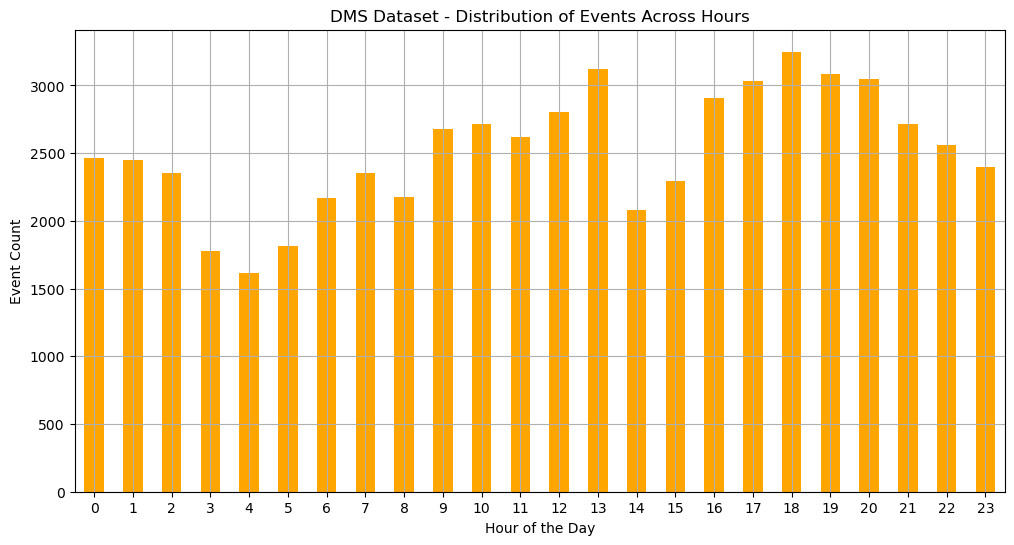

In [132]:
# Plotting the distribution of events across all hours
dms_data['Time'] = pd.to_datetime(dms_data['Time'])
dms_data['Hour'] = dms_data['Time'].dt.hour
hourly_counts_new = dms_data.groupby(dms_data['Hour'])['Alert'].count()
plt.figure(figsize=(12, 6))
hourly_counts_new.plot(kind='bar', color='orange')
plt.title("DMS Dataset - Distribution of Events Across Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Event Count")
plt.xticks(rotation=0)
plt.grid()
plt.show()

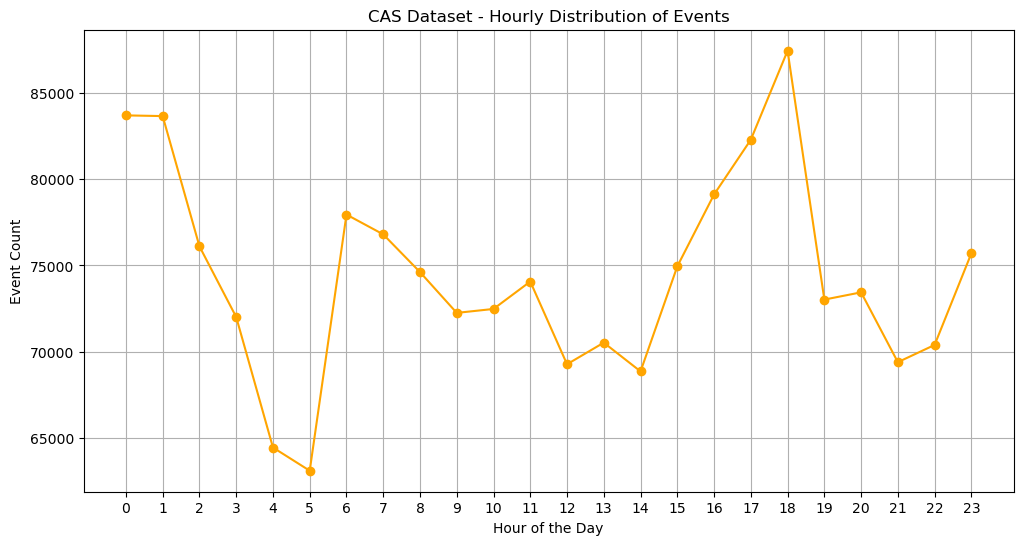

In [111]:
# Event distribution over time in CAS dataset
plt.figure(figsize=(12, 6))
hourly_counts = cas_data.groupby('Hour')['Alert'].count()
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='orange')
plt.title("CAS Dataset - Hourly Distribution of Events")
plt.xlabel("Hour of the Day")
plt.ylabel("Event Count")
plt.xticks(np.arange(0, 24, 1))
plt.grid()
plt.show()

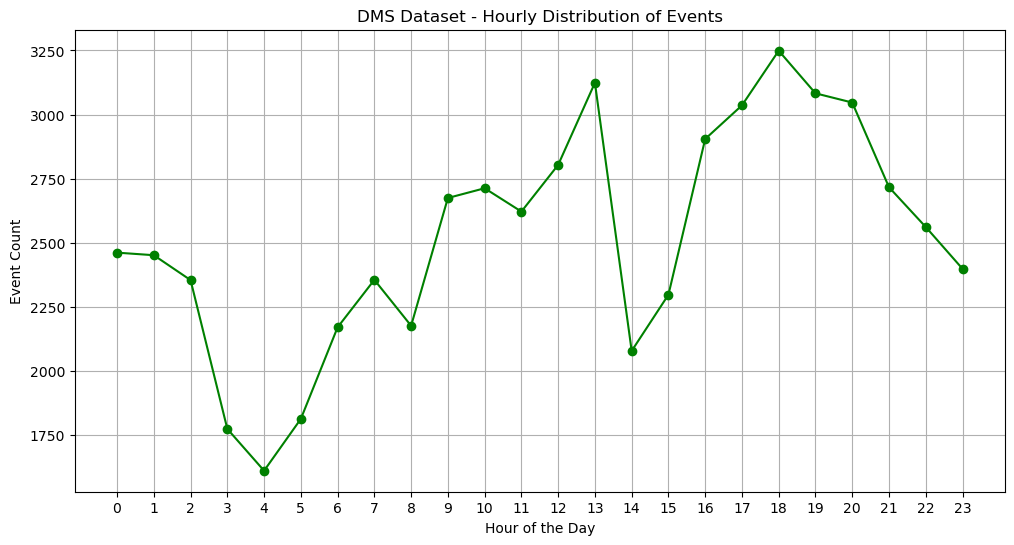

In [112]:
# Event distribution over time in DMS dataset
dms_data['Time'] = pd.to_datetime(dms_data['Time'])
dms_data['Hour'] = dms_data['Time'].dt.hour
plt.figure(figsize=(12, 6))
hourly_counts_dms = dms_data.groupby('Hour')['Alert'].count()
plt.plot(hourly_counts_dms.index, hourly_counts_dms.values, marker='o', color='green')
plt.title("DMS Dataset - Hourly Distribution of Events")
plt.xlabel("Hour of the Day")
plt.ylabel("Event Count")
plt.xticks(np.arange(0, 24, 1))
plt.grid()
plt.show()

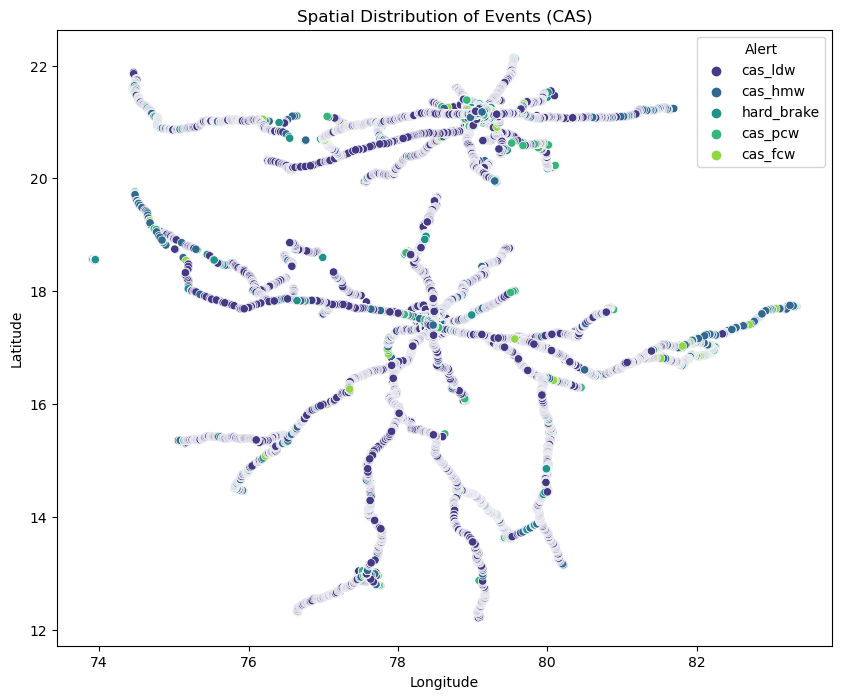

In [113]:
import seaborn as sns
# Plot spatial distribution of events
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Long', y='Lat', data=cas_data, hue='Alert', palette='viridis')
plt.title('Spatial Distribution of Events (CAS)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

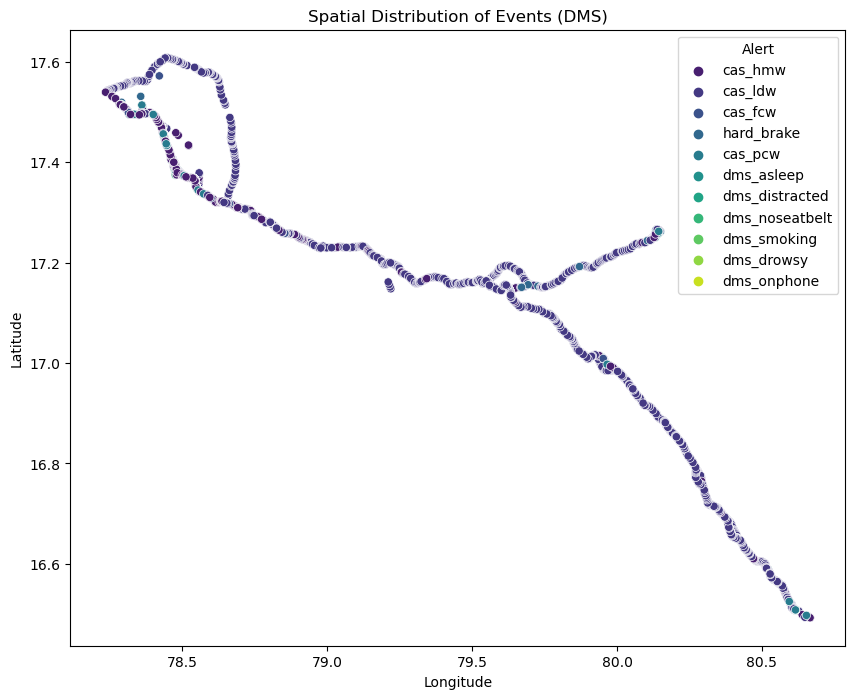

In [114]:
# Plot spatial distribution of events
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Long', y='Lat', data=dms_data, hue='Alert', palette='viridis')
plt.title('Spatial Distribution of Events (DMS)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

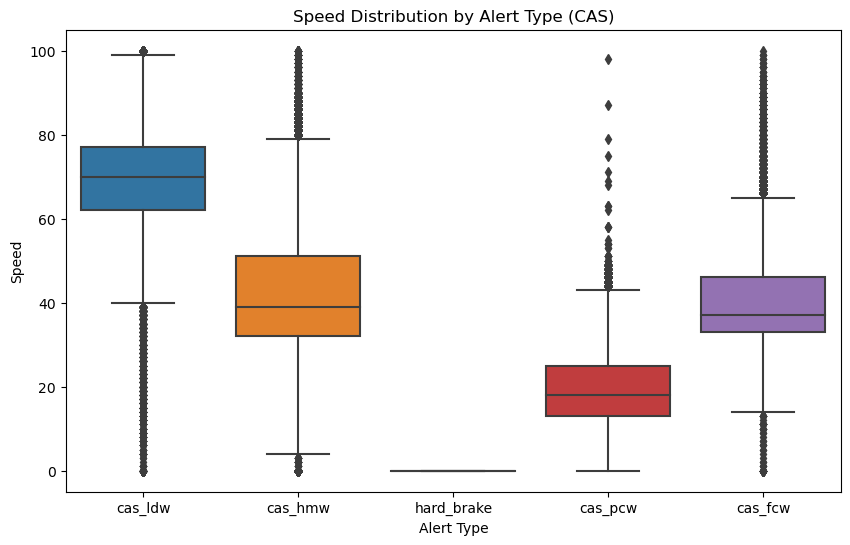

In [115]:
# Plot speed distribution by alert type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alert', y='Speed', data=cas_data)
plt.title('Speed Distribution by Alert Type (CAS)')
plt.xlabel('Alert Type')
plt.ylabel('Speed')
plt.show()

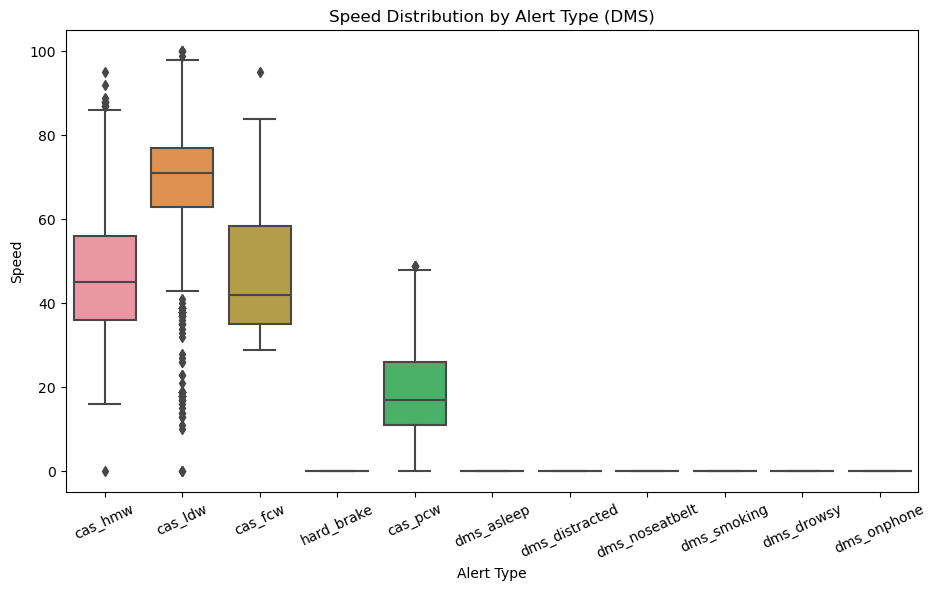

In [116]:
# Plot speed distribution by alert type
plt.figure(figsize=(11, 6))
sns.boxplot(x='Alert', y='Speed', data=dms_data)
plt.title('Speed Distribution by Alert Type (DMS)')
plt.xlabel('Alert Type')
plt.xticks(rotation=25)
plt.ylabel('Speed')
plt.show()

C:\Users\SIVA KASHYAP\AppData\Local\Temp\ipykernel_7272\3604643483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cas_data.corr()


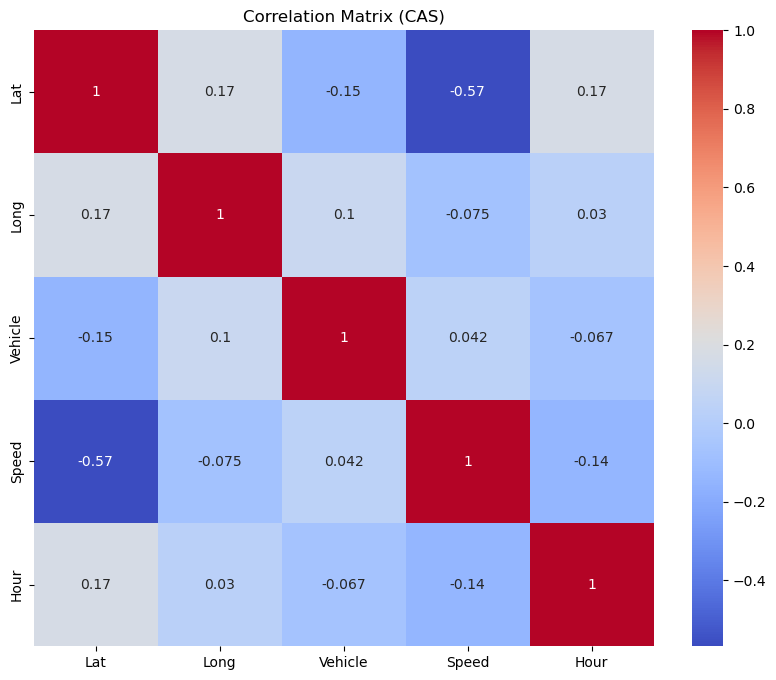

In [117]:
# Perform correlation analysis
correlation_matrix = cas_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (CAS)')
plt.show()

C:\Users\SIVA KASHYAP\AppData\Local\Temp\ipykernel_7272\847187419.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dms_data.corr()


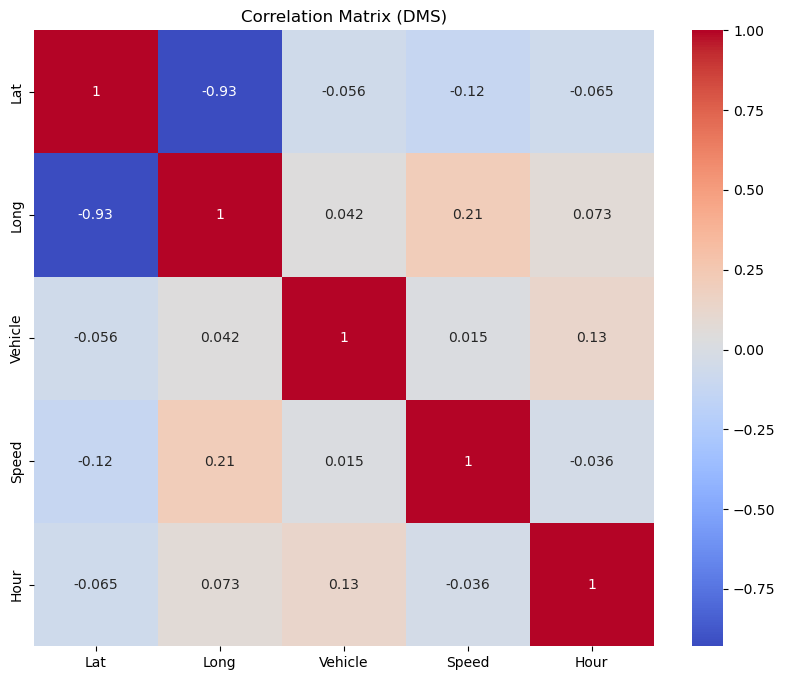

In [118]:
# Perform correlation analysis
correlation_matrix = dms_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (DMS)')
plt.show()

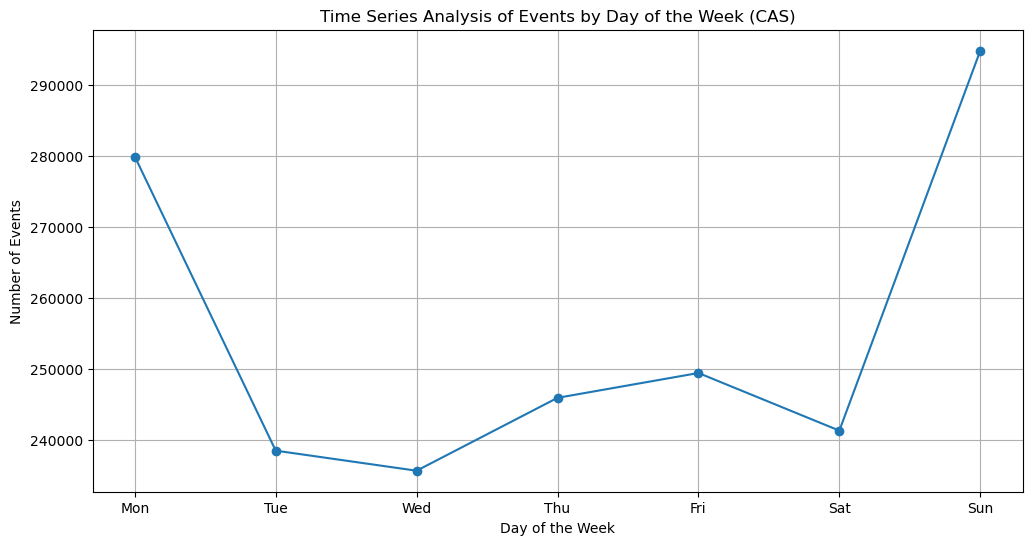

In [128]:
# Plot time series analysis with day of the week information
cas_data['Day_of_Week'] = cas_data.index.dayofweek
events_by_dayofweek = cas_data.groupby('Day_of_Week').size()
plt.figure(figsize=(12, 6))
events_by_dayofweek.plot(marker='o', linestyle='-')
plt.title('Time Series Analysis of Events by Day of the Week (CAS)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

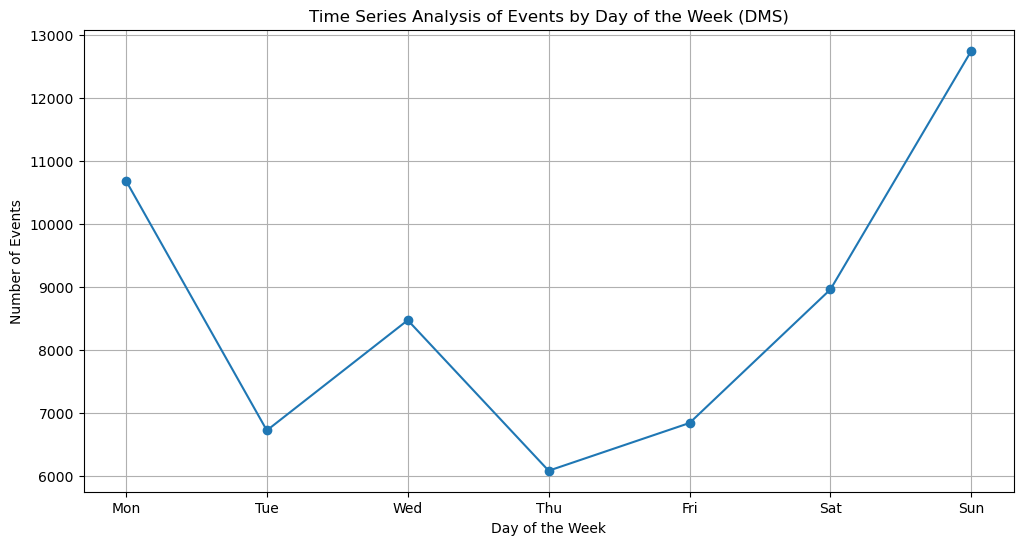

In [129]:
# Plot time series analysis with day of the week information
dms_data['Day_of_Week'] = dms_data.index.dayofweek
events_by_dayofweek_new = dms_data.groupby('Day_of_Week').size()
plt.figure(figsize=(12, 6))
events_by_dayofweek_new.plot(marker='o', linestyle='-')
plt.title('Time Series Analysis of Events by Day of the Week (DMS)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

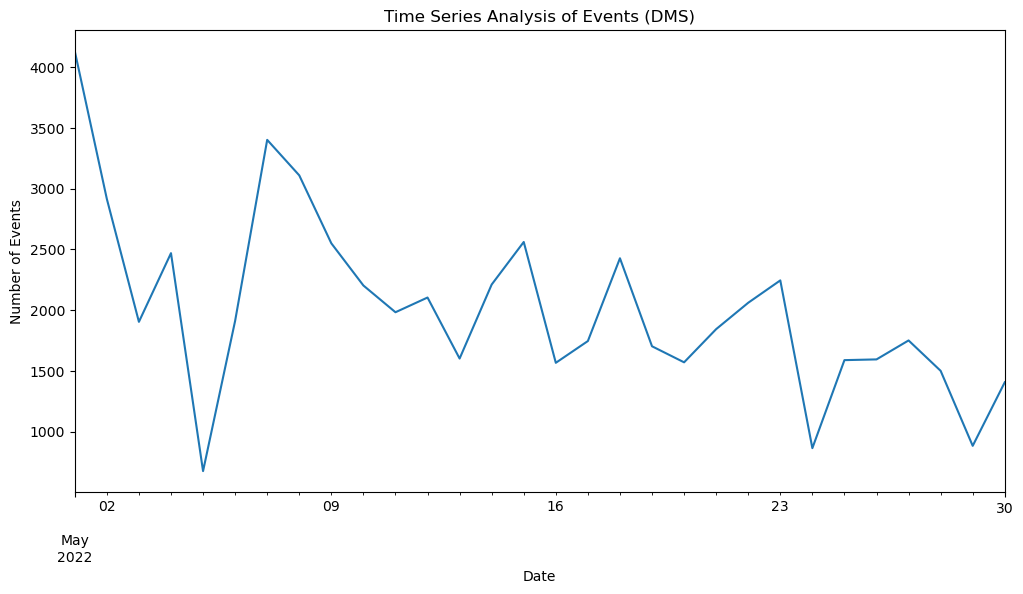

In [121]:
# Perform time series analysis
dms_data['Date'] = pd.to_datetime(dms_data['Date'])
dms_data.set_index('Date', inplace=True)
events_by_day_new = dms_data.resample('D').size()

plt.figure(figsize=(12, 6))
events_by_day_new.plot()
plt.title('Time Series Analysis of Events (DMS)')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

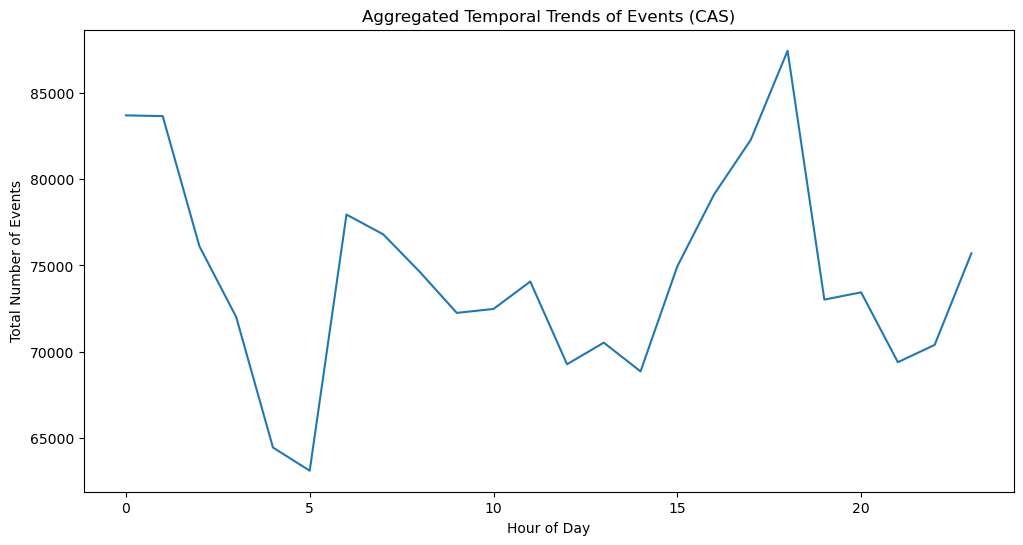

In [136]:
# Aggregate data by hour across all vehicles
events_by_hour_agg = cas_data.groupby('Hour').size().reset_index(name='Total_Event_Count')
# Plot aggregated temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Total_Event_Count', data=events_by_hour_agg)
plt.title('Aggregated Temporal Trends of Events (CAS)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Events')
plt.show()

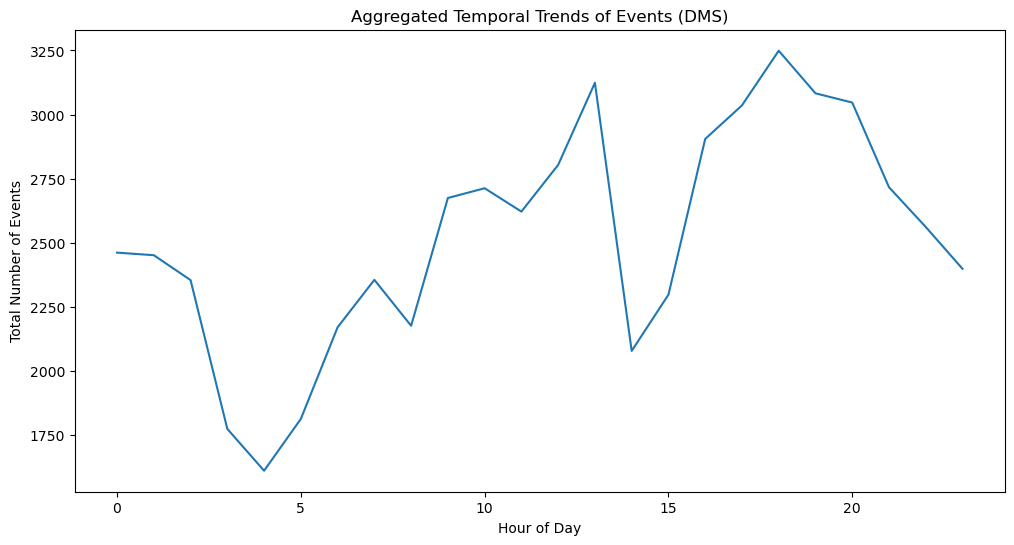

In [75]:
# Aggregate data by hour across all vehicles
events_by_hour_agg_new = dms_data.groupby('Hour').size().reset_index(name='Total_Event_Count')

# Plot aggregated temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Total_Event_Count', data=events_by_hour_agg_new)
plt.title('Aggregated Temporal Trends of Events (DMS)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Events')
plt.show()

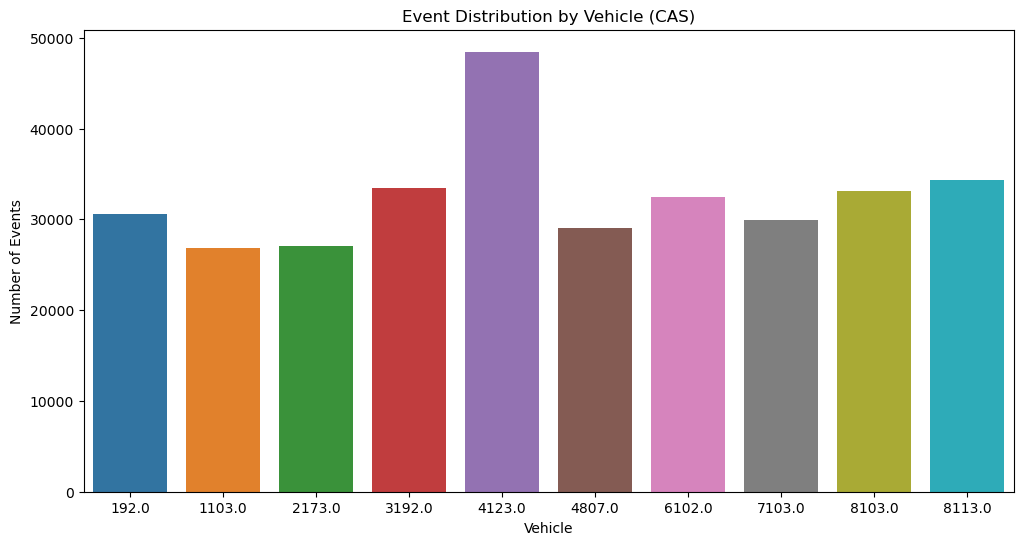

In [83]:
#Event distribution by Vehicle
top_10_categories = cas_data['Vehicle'].value_counts().head(10).index.tolist()
top_10_data = cas_data[cas_data['Vehicle'].isin(top_10_categories)]
plt.figure(figsize=(12, 6))
sns.countplot(x='Vehicle', data=top_10_data)
plt.title('Event Distribution by Vehicle (CAS)')
plt.xlabel('Vehicle')
plt.ylabel('Number of Events')
plt.show()

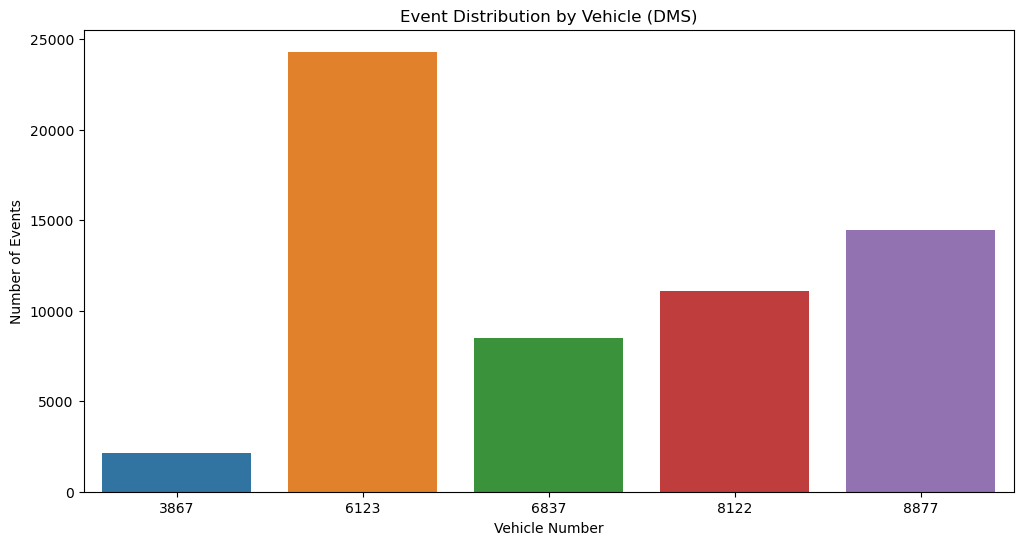

In [88]:
top_10_categories_new = dms_data['Vehicle'].value_counts().head(10).index.tolist()
top_10_data_new = dms_data[dms_data['Vehicle'].isin(top_10_categories_new)]
plt.figure(figsize=(12, 6))
sns.countplot(x='Vehicle', data=top_10_data_new)
plt.title('Event Distribution by Vehicle (DMS)')
plt.xlabel('Vehicle Number')
plt.ylabel('Number of Events')
plt.show()

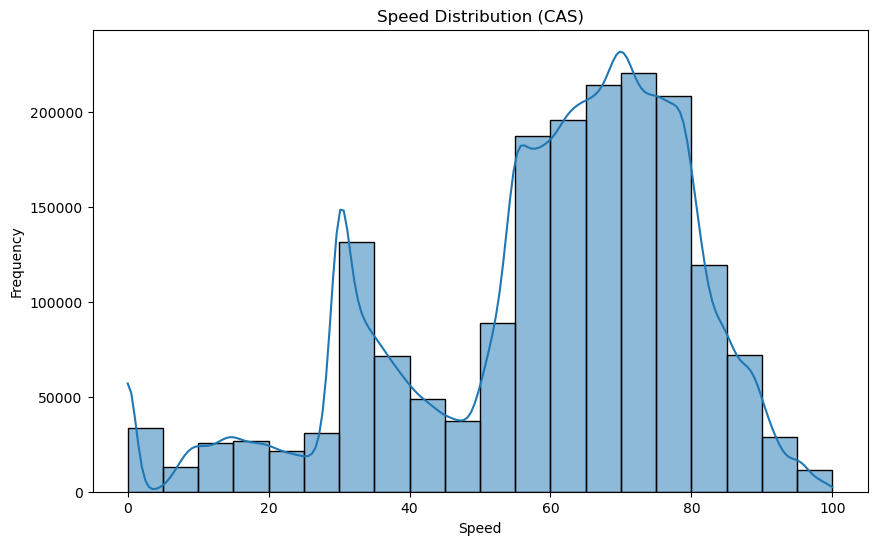

In [82]:
#Speed distribution frequency
plt.figure(figsize=(10, 6))
sns.histplot(x='Speed', data=cas_data, bins=20, kde=True)
plt.title('Speed Distribution (CAS)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

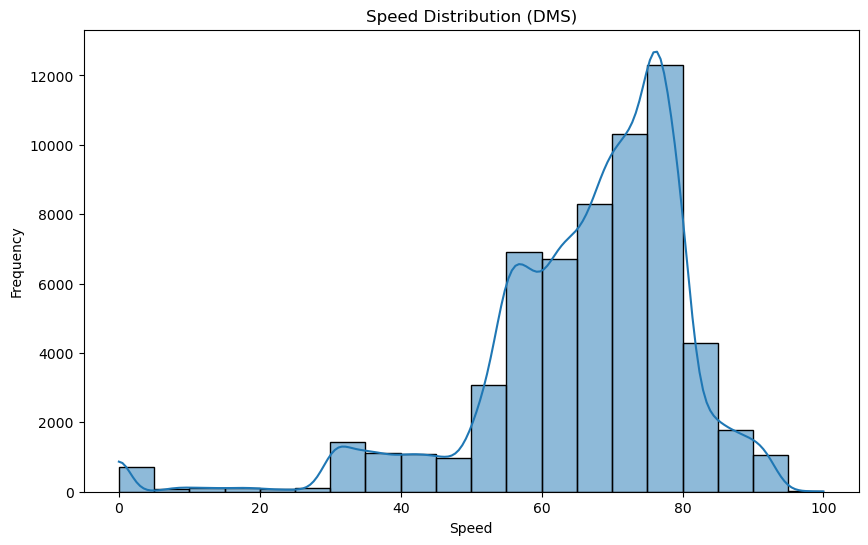

In [89]:
#Speed distribution frequency
plt.figure(figsize=(10, 6))
sns.histplot(x='Speed', data=dms_data, bins=20, kde=True)
plt.title('Speed Distribution (DMS)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

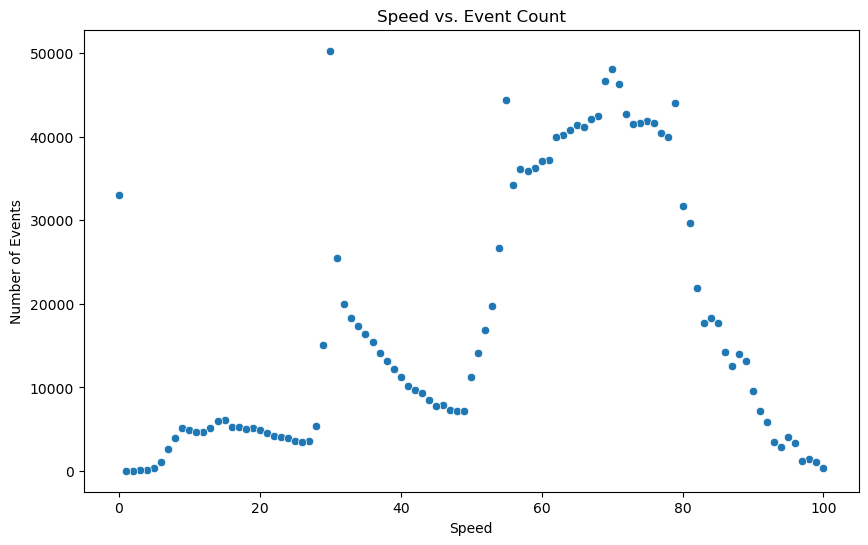

In [131]:
# Plot speed vs. event count
events_by_speed = cas_data['Speed'].value_counts().reset_index()
events_by_speed.columns = ['Speed', 'Event_Count']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed', y='Event_Count', data=events_by_speed)
plt.title('Speed vs. Event Count')
plt.xlabel('Speed')
plt.ylabel('Number of Events')
plt.show()